## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 2s 45us/step - loss: 0.6187 - accuracy: 0.7781 - val_loss: 1.8912 - val_accuracy: 0.5036
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.5854 - accuracy: 0.7897 - val_loss: 2.0299 - val_accuracy: 0.5035
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (D

50000/50000 [==============================] - 2s 46us/step - loss: 1.0155 - accuracy: 0.6447 - val_loss: 1.5143 - val_accuracy: 0.4932
Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.0106 - accuracy: 0.6440 - val_loss: 1.4215 - val_accuracy: 0.4958
Epoch 49/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.0007 - accuracy: 0.6506 - val_loss: 1.3540 - val_accuracy: 0.5243
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.9800 - accuracy: 0.6564 - val_loss: 1.3916 - val_accuracy: 0.5211
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 2s 47us/step - loss: 1.5810 - accuracy: 0.4476 - val_loss: 1.5981 - val_accuracy: 0.4366
Epoch 46/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5772 - accuracy: 0.4493 - val_loss: 1.5844 - val_accuracy: 0.4484
Epoch 47/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5720 - accuracy: 0.4504 - val_loss: 1.5880 - val_accuracy: 0.4465
Epoch 48/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5680 - accuracy: 0.4530 - val_loss: 1.5829 - val_accuracy: 0.4449
Epoch 49/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5630 - accuracy: 0.4538 - val_loss: 1.5730 - val_accuracy: 0.4472
Epoch 50/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5582 - accuracy: 0.4552 - val_loss: 1.5698 - val_accuracy: 0.4497
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type

50000/50000 [==============================] - 2s 46us/step - loss: 1.9531 - accuracy: 0.3161 - val_loss: 1.9533 - val_accuracy: 0.3127
Epoch 44/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.9492 - accuracy: 0.3182 - val_loss: 1.9495 - val_accuracy: 0.3143
Epoch 45/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.9454 - accuracy: 0.3194 - val_loss: 1.9457 - val_accuracy: 0.3157
Epoch 46/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9417 - accuracy: 0.3201 - val_loss: 1.9422 - val_accuracy: 0.3186
Epoch 47/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9381 - accuracy: 0.3221 - val_loss: 1.9387 - val_accuracy: 0.3185
Epoch 48/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9346 - accuracy: 0.3225 - val_loss: 1.9354 - val_accuracy: 0.3208
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9313 - accuracy: 0.3244 - val_loss: 1.9320

50000/50000 [==============================] - 2s 45us/step - loss: 2.2471 - accuracy: 0.1895 - val_loss: 2.2458 - val_accuracy: 0.1924
Epoch 42/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.2454 - accuracy: 0.1921 - val_loss: 2.2441 - val_accuracy: 0.1942
Epoch 43/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2437 - accuracy: 0.1945 - val_loss: 2.2424 - val_accuracy: 0.1959
Epoch 44/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2420 - accuracy: 0.1966 - val_loss: 2.2407 - val_accuracy: 0.1977
Epoch 45/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.2403 - accuracy: 0.1987 - val_loss: 2.2390 - val_accuracy: 0.2008
Epoch 46/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.2386 - accuracy: 0.2007 - val_loss: 2.2373 - val_accuracy: 0.2017
Epoch 47/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.2369 - accuracy: 0.2026 - val_loss: 2.2356

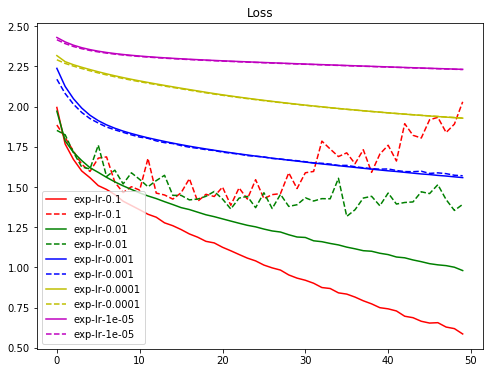

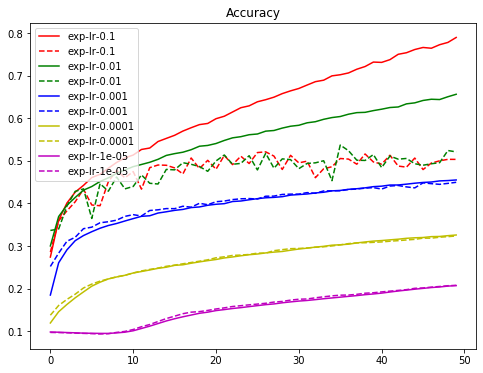

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()